<a href="https://colab.research.google.com/github/SJhawar1010/Deep-Learning/blob/main/2348554_DL_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.metrics import confusion_matrix
import itertools

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/DL Datasets/Animal/train'
val_path = '/content/drive/MyDrive/DL Datasets/Animal/val'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 497 images belonging to 5 classes.
Found 1510 images belonging to 5 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes
])

In [6]:
# Training Strategy
model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint('animal_classification_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[checkpoint, early_stopping, tensorboard]
)

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 5.1023 - accuracy: 0.8796
Epoch 1: val_loss improved from inf to 13.27880, saving model to animal_classification_model.keras
15/15 [==============================] - 1059s 75s/step - loss: 5.1023 - accuracy: 0.8796 - val_loss: 13.2788 - val_accuracy: 0.1995
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 4.0094 - accuracy: 0.9333
Epoch 2: val_loss did not improve from 13.27880
15/15 [==============================] - 171s 12s/step - loss: 4.0094 - accuracy: 0.9333 - val_loss: 40.3086 - val_accuracy: 0.1981
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 2.3347 - accuracy: 0.9441
Epoch 3: val_loss did not improve from 13.27880
15/15 [==============================] - 168s 12s/step - loss: 2.3347 - accuracy: 0.9441 - val_loss: 56.6715 - val_accuracy: 0.1981
Epoch 4/20
15/15 [==============================] - ETA: 0s - loss: 1.6329 - accuracy: 0.9527
Epoch 4: val_loss did not improv

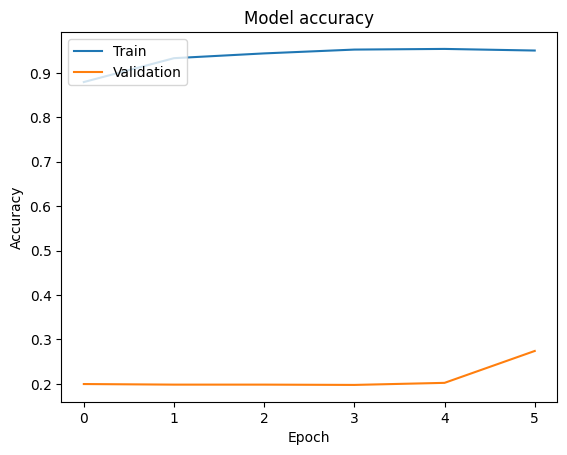

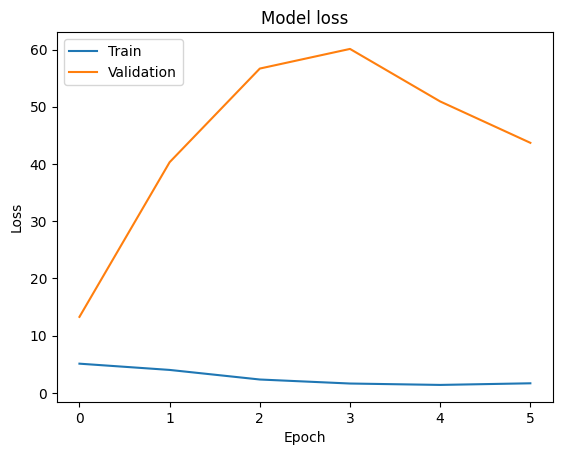

48/48 [==============================] - 71s 1s/step
Confusion matrix, without normalization


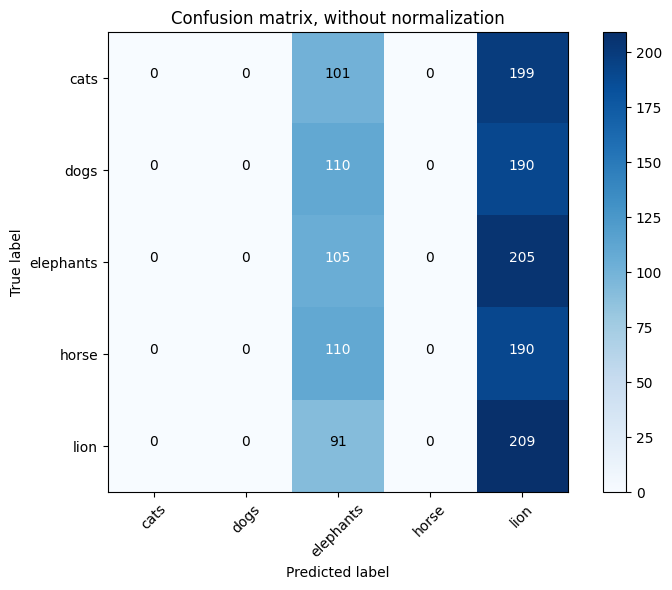

In [7]:
# Visualization
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Predict classes for validation set
val_generator.reset()
y_pred = model.predict(val_generator)
y_true = val_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix, classes=['cats', 'dogs', 'elephants', 'horse', 'lion'], title='Confusion matrix, without normalization')

plt.show()


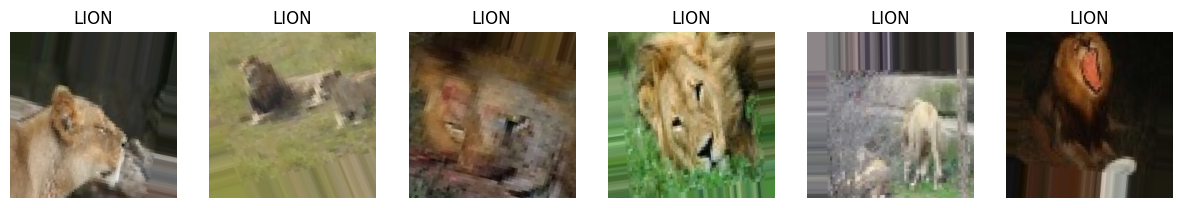

In [11]:
# Visualize sample images from the dataset
def plot_images(images, labels, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Get a batch of images and labels from the training generator
sample_images, sample_labels = next(train_generator)

# Convert labels from one-hot encoded format to class names
class_names = list(train_generator.class_indices.keys())
sample_labels = [class_names[np.argmax(label)] for label in sample_labels]

# Plot sample images
plot_images(sample_images, sample_labels)
